In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
import re

In [10]:
data=pd.read_csv("Reviews_dataset_new.csv", index_col="Unnamed: 0")

In [11]:
stars= lambda x:str(x.split(" ")[0])
data["Stars"]=data["Stars"].apply(stars)

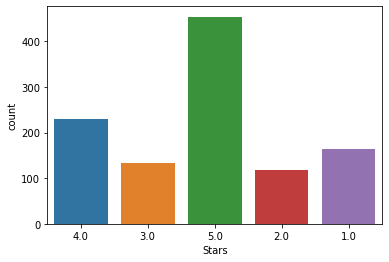

In [12]:
sns.countplot(x="Stars",data=data);

In [13]:
data.drop("Names",inplace=True, axis=1)

In [14]:
data.dropna(inplace=True)

In [15]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [16]:
accented_chars=lambda x:remove_accented_chars(x)
data['Product_Review'].apply(accented_chars)

0       The phone is slim which makes it look attracti...
1       The Samsung Galaxy M53 5G mobile phone is awes...
2       Date of purchase: 26.09.22Actual Price = 21999...
3       The media could not be loaded.\n              ...
4       Camera is not like 108 mp rest is good. Overal...
                              ...                        
1095                                                 Like
1096                                   Nothing to dislike
1097                                          Excellent..
1098             Beautiful phone, slim and great display.
1099    Battery , touch for the phone is poor. Perform...
Name: Product_Review, Length: 1069, dtype: object

In [17]:
import string
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

In [18]:
data[data.columns[1]]=data[data.columns[1]].apply(lambda x: clean_text(x))
data[data.columns[2]]=data[data.columns[2]].apply(lambda x: clean_text(x))

In [19]:
data.head(2)

,Stars,Review_title,Product_Review
0,4.0,good phone,the phone is slim which makes it look attracti...
1,3.0,camera result is very poor and it is not worth...,the samsung galaxy mobile phone is awesomei ...


In [22]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [23]:
data_review=pd.DataFrame(columns=["Reviews"])
data_review1=data["Product_Review"].apply(lambda x: " ".join((lemmatizer.lemmatize(x) for x in x.split())))
data_review["Reviews"]=data["Product_Review"].apply(lambda x: " ".join((lemmatizer.lemmatize(x) for x in x.split())))

In [24]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_review["Reviews"]=data_review["Reviews"].apply(lambda x: " ".join(x for x in x.split()  if x not in stop))
data_review1=data_review1.apply(lambda x: " ".join(x for x in x.split()  if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df = 7)
x=vectorizer.fit_transform(data_review1)